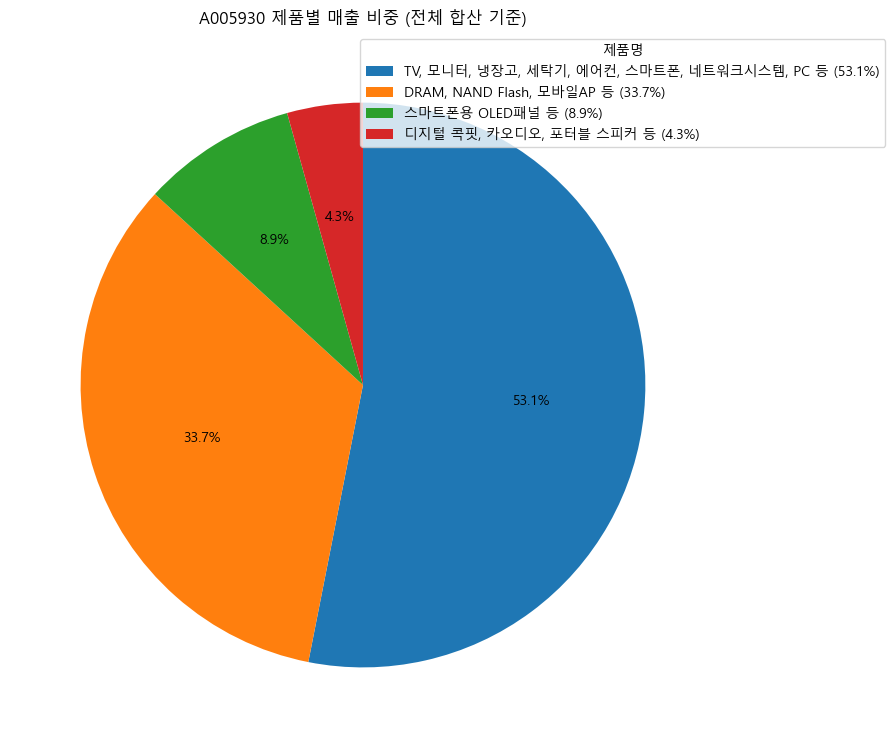

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 불러오기
df = pd.read_csv(r'C:\Users\bitcamp\OneDrive\Desktop\pythontraning\코스피_매출비중추이_전체.csv')

# 불필요한 컬럼 제거
df.drop(['2021/12', '2022/12', '2023/12', '2021/09', '2022/09', '2023/09',
         '2021/03', '2022/03', '2023/03', '2021/06', '2022/06', '2023/06',
         '2021/11', '2022/11', '2023/11'], axis=1, inplace=True)

# 종목코드 필터링
target_code = "A005930"
df_one = df[df["종목코드"] == target_code].reset_index(drop=True)
df_one.set_index('제품명', inplace=True)

# 유효한 연도 컬럼 추출
year_columns = [col for col in df_one.columns if "20" in col and not df_one[col].isnull().all()]
df_valid = df_one[year_columns]

# 제품별 합계
product_totals = df_valid.sum(axis=1)
product_totals = product_totals[product_totals > 0]

# 비율 구해서 레전드 라벨 만들기
total = product_totals.sum()
legend_labels = [f"{name} ({value / total * 100:.1f}%)" for name, value in product_totals.items()]

# 파이차트
plt.figure(figsize=(9, 9))
wedges, texts, autotexts = plt.pie(
    product_totals,
    autopct='%.1f%%',
    startangle=90,
    counterclock=False,
    textprops={'fontsize': 10}
)

# ✅ 레전드를 오른쪽 위에 고정
plt.legend(
    wedges,
    legend_labels,
    title="제품명",
    loc="upper right",            # 위치 기준
    bbox_to_anchor=(1.25, 1),     # 그래프 바깥 오른쪽 위
    fontsize=10
)

plt.title(f"{target_code} 제품별 매출 비중 (전체 합산 기준)")
plt.tight_layout()
plt.savefig(f"{target_code}_제품별_매출비중_파이차트.png", dpi=300)
plt.show()






In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# CSV 불러오기
df = pd.read_csv(r'C:\Users\bitcamp\OneDrive\Desktop\pythontraning\코스피_매출비중추이_전체.csv')

# 불필요한 컬럼 제거
df.drop(['2021/12', '2022/12', '2023/12', '2021/09', '2022/09', '2023/09',
         '2021/03', '2022/03', '2023/03', '2021/06', '2022/06', '2023/06',
         '2021/11', '2022/11', '2023/11'], axis=1, inplace=True)

# 저장 폴더 생성
output_dir = r'C:\Users\bitcamp\OneDrive\Desktop\pythontraning\매출그래프'
os.makedirs(output_dir, exist_ok=True)

# 종목코드별 반복
for code in df['종목코드'].dropna().unique():
    df_one = df[df["종목코드"] == code].reset_index(drop=True)
    if df_one.empty:
        continue

    df_one.set_index('제품명', inplace=True)

    # 유효한 연도 컬럼만 추출
    year_columns = [col for col in df_one.columns if "20" in col and not df_one[col].isnull().all()]
    df_valid = df_one[year_columns]
    if df_valid.empty:
        continue

    # 제품별 합계
    product_totals = df_valid.sum(axis=1)
    product_totals = product_totals[product_totals > 0]

    if product_totals.empty:
        continue

    total = product_totals.sum()
    legend_labels = [f"{name} ({value / total * 100:.1f}%)" for name, value in product_totals.items()]

    # 파이차트 그리기
    plt.figure(figsize=(9, 9))
    wedges, texts, autotexts = plt.pie(
    product_totals,
    autopct='%.1f%%',
    startangle=90,
    counterclock=False,
    textprops={'fontsize': 10}
    )

# ✅ 레전드를 오른쪽 위에 고정
    plt.legend(
    wedges,
    legend_labels,
    title="제품명",
    loc="upper right",            # 위치 기준
    bbox_to_anchor=(1.25, 1),     # 그래프 바깥 오른쪽 위
    fontsize=10
    )

    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"{code}_제품별_매출비중.png"), dpi=300)
    plt.close()

print(f"✅ 총 {df['종목코드'].nunique()}개 종목 처리 완료\n📁 저장 위치: {output_dir}")

✅ 총 819개 종목 처리 완료
📁 저장 위치: C:\Users\bitcamp\OneDrive\Desktop\pythontraning\매출그래프
